# Huffman Coding

Huffman coding is an algorithm for [lossless data compression](https://en.wikipedia.org/wiki/Lossless_data_compression)

This notebook will implement huffman coding to compress the entire works of [William Shakespeare](https://en.wikipedia.org/wiki/William_Shakespeare).

In [4]:
with open('shakespeare.txt') as file:
    text = ""
    for i in file:
        text+=i
        

This

In [5]:
counts = {i : text.count(i) for i in "abcdefghijklmnopqrstuvwxyz"}
total_letters = sum(counts.values())


We can now use these values to calculate the frequency of these letters in Shakespeare's works.

In [6]:
for i in counts.keys():
    print()

In [64]:
total = 0 
perc = []
for i in counts.keys():
    perc.append(counts[i]/sum(counts.values())*100)
print(total)

percentage of a: 7.448198476331609
percentage of b: 1.4165511794937469
percentage of c: 2.0270247607547907
percentage of d: 4.072375010862655
percentage of e: 12.314911795242386
percentage of f: 2.093892977312678
percentage of g: 1.736530689096334
percentage of h: 6.653280826689962
percentage of i: 6.030641071964897
percentage of j: 0.08205306464080059
percentage of k: 0.8897162293399927
percentage of l: 4.449312946607574
percentage of m: 2.909880365960937
percentage of n: 6.572843820178467
percentage of o: 8.565352018624308
percentage of p: 1.414904629701624
percentage of q: 0.07317999076102617
percentage of r: 6.35717628907316
percentage of s: 6.54595017357379
percentage of t: 8.82440918591834
percentage of u: 3.4954727503632324
percentage of v: 1.0349480193378124
percentage of w: 2.221104194585595
percentage of x: 0.1408714822149754
percentage of y: 2.596060172247403
percentage of z: 0.03335787912190109
0


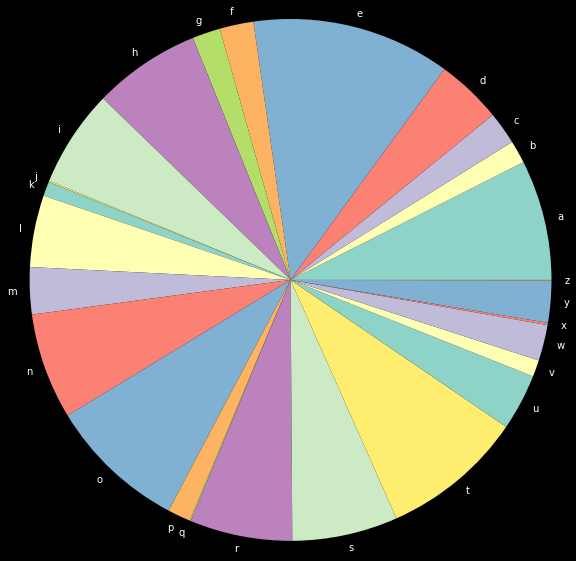

In [62]:
import matplotlib.pyplot as plt

plt.pie(perc, 
        labels=counts.keys(), 
        radius=3, 
        labeldistance=1.05,)
plt.show()